In [1]:
import pandas as pd
import matplotlib as plt
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
import json 

from alerts import get_alerts

ModuleNotFoundError: No module named 'astropy'

In [107]:
alerts = get_alerts()

In [113]:
alerts.columns

Index(['Event', 'Class', 'RA', 'RA Unc (rectangle)', 'Dec',
       'Dec Unc (rectangle)', 'arrival time [UT]', 'Signalness', 'initial RA',
       'initial Dec', 'initial Error90 [arcmin]', 'retracted',
       'direction uncertainty missing', 'reason', 'RA Unc (rectangle) float',
       'Dec Unc (rectangle) float', '1h coverage', '2h coverage',
       '4h coverage', '8h coverage', '12h coverage', '24h coverage',
       '2d coverage', '3d coverage', '4d coverage', '5d coverage',
       '6d coverage', '7d coverage', '14d coverage', 'observed',
       'controll_Event', 'Before', 'After', 'closest_obs', 'closest_obs_side'],
      dtype='object')

In [121]:
info = alerts[alerts.Event == "IC170922A"].iloc[0][[
    'Event', 'RA', 'RA Unc (rectangle)', 'Dec',
       'Dec Unc (rectangle)', 'arrival time [UT]', 'Signalness', 'initial RA',
       'initial Dec', 'initial Error90 [arcmin]', '1h coverage', '2h coverage',
       '4h coverage', '8h coverage', '12h coverage', '24h coverage',
       '2d coverage', '3d coverage', '4d coverage', '5d coverage',
       '6d coverage', '7d coverage', '14d coverage'
]].to_dict()

with open("data/ic170922a_info.json", "w") as f:
    json.dump(info, f, indent=4)

In [14]:
r = pd.read_csv("data/fermi_matches.csv", index_col=[0,1,2]).iloc[1]

In [19]:
r

3FHL Name                     3FHL J0509.4+0542 
4FGL Name                     4FGL J0509.4+0542 
Fermi ra                                 77.3593
Fermi dec                                 5.7014
Counterpart         TXS 0506+056                
Counterpart ra                         77.358185
Counterpart dec                         5.693148
Counterpart prob                        0.990185
ra                                     77.358185
dec                                     5.693148
Name: (IC170922A, 4FGL, 0), dtype: object

In [3]:
txs_data = pd.read_csv("data/txs.csv")

In [15]:
fgl_name = r['4FGL Name']
counterpart_name = r['Counterpart']
neutrino_name = r.name[0]
neutrino_time_pre = r.name[0].strip('A').strip('B').split('IC')[-1]
neutrino_mjd = Time(f"20{neutrino_time_pre[:2]}-{neutrino_time_pre[2:4]}-{neutrino_time_pre[-2:]}").mjd

In [38]:
icecube_loc = EarthLocation(lon=0, lat=-90, height=2450)
time_inp = Time(neutrino_mjd, format='mjd', scale='utc', location=icecube_loc)

target = SkyCoord(r.ra, r.dec, unit=(u.deg, u.deg), frame='icrs')
ltt_helio = time_inp.light_travel_time(target, 'heliocentric')
time_inp = Time(time_inp.utc - ltt_helio, format='jd', scale='utc', location=icecube_loc)



In [25]:
time_inp.jd

2458018.4988370547

,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
0,2.457676e+06,2016-10-14.4214702,bc,1.53,17.112,16.199,0.094,1.271,0.110,V
1,2.457679e+06,2016-10-17.4769062,bc,1.63,17.151,>17.151,99.990,0.512,0.106,V
2,2.457687e+06,2016-10-25.4200721,bc,1.48,17.860,17.091,0.107,0.559,0.055,V
3,2.457690e+06,2016-10-28.5366350,bc,1.69,17.700,16.934,0.108,0.646,0.064,V
4,2.457692e+06,2016-10-30.1759349,bg,1.37,17.184,>17.184,99.990,0.124,0.103,V
...,...,...,...,...,...,...,...,...,...,...
771,2.459667e+06,2022-03-28.1072677,bs,1.61,18.043,16.838,0.072,0.668,0.044,g
772,2.459667e+06,2022-03-28.9943907,bG,1.60,18.037,17.172,0.098,0.491,0.044,g
773,2.459669e+06,2022-03-30.0144550,bk,1.45,18.429,>18.429,99.990,-0.137,0.031,g
774,2.459671e+06,2022-04-01.1001081,bs,2.04,18.237,>18.237,99.990,-0.451,0.037,g


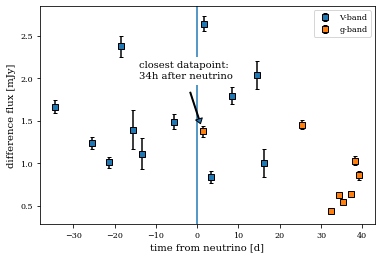

,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
55,2.457984e+06,2017-08-18.5982202,bc,1.57,17.490,15.908,0.051,1.662,0.078,V
56,2.457993e+06,2017-08-27.5486944,bc,1.65,17.604,16.235,0.062,1.231,0.070,V
57,2.457997e+06,2017-08-31.5799047,bc,1.54,17.737,16.452,0.067,1.007,0.062,V
58,2.458000e+06,2017-09-03.5310643,bc,1.41,16.994,15.521,0.056,2.374,0.122,V
59,2.458003e+06,2017-09-06.5269636,bc,1.63,16.316,16.100,0.180,1.393,0.228,V
60,2.458005e+06,2017-09-08.5594254,bc,1.58,16.567,16.346,0.179,1.111,0.181,V
61,2.458013e+06,2017-09-16.3309614,bg,1.74,17.349,16.031,0.065,1.484,0.088,V
62,2.458020e+06,2017-09-23.4173850,bs,2.48,17.693,16.057,0.048,1.372,0.061,g
63,2.458020e+06,2017-09-23.6084454,bc,1.56,17.349,15.406,0.036,2.639,0.088,V
64,2.458022e+06,2017-09-25.3166042,bg,1.49,17.623,16.653,0.089,0.837,0.069,V


In [111]:
m = (txs_data.HJD > time_inp.jd - 40) & (txs_data.HJD < time_inp.jd + 40)

min_ind = np.argmin(abs(txs_data.HJD - time_inp.jd))
min_r = txs_data.iloc[min_ind]

fig, ax = plt.subplots()

for f in txs_data.Filter.unique():
    bm = txs_data.Filter == f
    ax.errorbar(txs_data.HJD[m & bm]-time_inp.jd, txs_data["flux(mJy)"][m & bm], yerr=txs_data["flux_err"][m & bm], 
                ls='', marker='s', mec='k', ecolor='k', capsize=2, label=f"{f}-band")
    
ax.axvline(0)
ax.annotate(
    f"closest datapoint:\n{(min_r.HJD - time_inp.jd) * 24:.0f}h after neutrino",
    (min_r.HJD - time_inp.jd, min_r["flux(mJy)"]),
    (-14, 2.),
    arrowprops={
        'width': 1,
        'headwidth': 7,
        'headlength': 5,
        'shrink': 0.15
    },
    backgroundcolor='w'
)


ax.set_xlabel("time from neutrino [d]")
ax.set_ylabel("difference flux [mJy]")
ax.legend()
fig.savefig("../figures/txs_dif.pdf")
plt.show()

txs_data[m]

In [ ]:
time_inp = Time(tinp, format='jd', scale='utc', location=location)

target = SkyCoord(ra, dec, unit=(u.deg, u.deg), frame='icrs')
ltt_helio = time_inp.light_travel_time(target, 'heliocentric')
time_inp = Time(time_inp.utc - ltt_helio, format='jd', scale='utc', location=location)

In [36]:
min(txs_data.HJD - time_inp.jd)



-342.57420705491677

In [64]:
txs_data.iloc[min_ind]

HJD               2458019.91873
UT Date      2017-09-23.4173850
Camera                       bs
FWHM                       2.48
Limit                    17.693
mag                      16.057
mag_err                   0.048
flux(mJy)                 1.372
flux_err                  0.061
Filter                        g
Name: 62, dtype: object

In [ ]:
info = {
    "neutrino_mjd": neutrino_mjd,
    "txs_ra": r.ra,
    "txs_dec": r.dec
}